# ANALISIS ECONOMETRCO


#### Objetivo

El objetivo es determinar la relación entre las variables de inclusión financiera y el aspecto economico en Colombia. Para ello, se está analizando una base de datos que recopila más de 120 variables relacionadas con la inclusión financiera, abarcando el periodo comprendido entre los años 2017 y 2022.

El presente trabajo incorpora tres análisis que exploran la relación entre las variables de inclusión financiera y diferentes aspectos de la economía de un territorio. Los análisis son los siguientes:

- Relación entre las variables de inclusión financiera y el Valor Agregado (PIB).
- Relación entre las variables de inclusión financiera y las finanzas personales.
- Relación entre las variables de inclusión financiera y la creación de empresas."

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

warnings.filterwarnings("ignore", category=UserWarning)


In [4]:
data = pd.read_csv(r'C:\Users\santi\OneDrive\Escritorio\projects\econometria\data_final.csv', thousands=',', decimal='.')

### Estadistica descriptiva

La idea es hacer un analisis general de las variables que vamos a usar. 

C:\Users\santi\AppData\Local\Temp\ipykernel_20992\3918997963.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_grouped, x='AÑO', y='VALOR AGREGADO', hue='REGION', marker='o', ci=None)


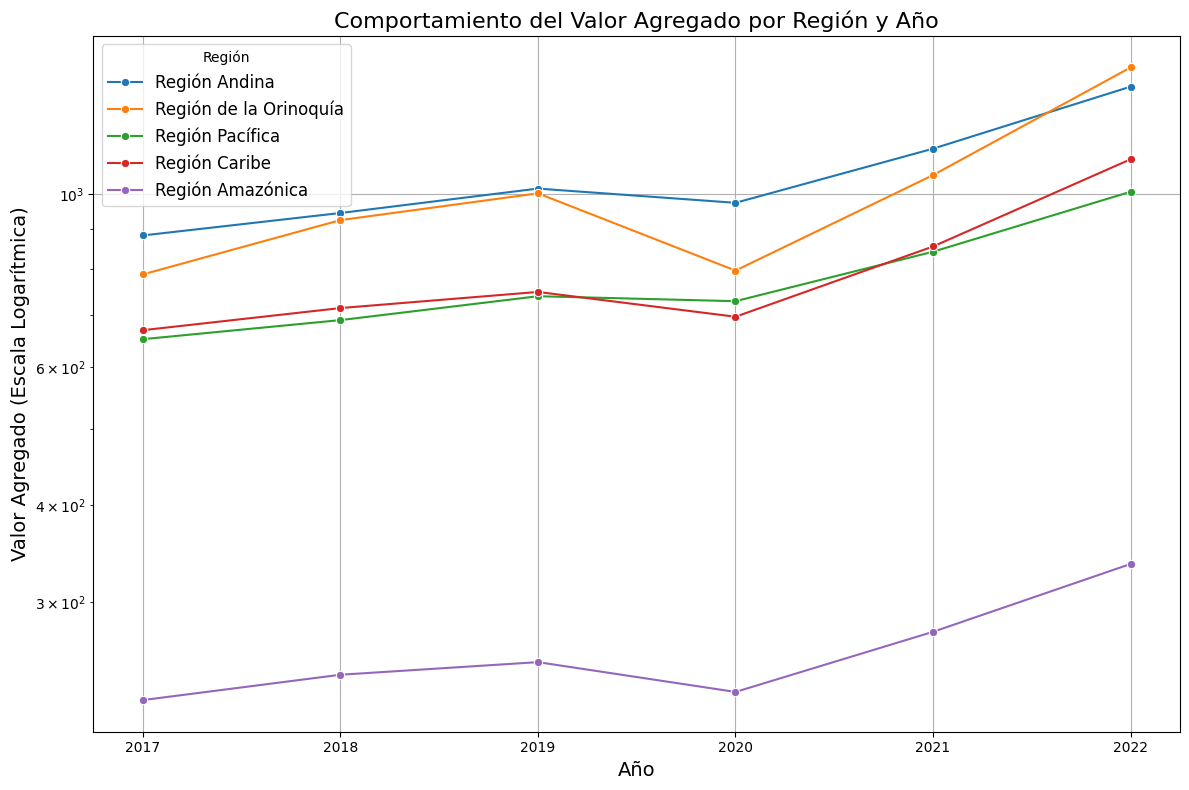

In [5]:

data_grouped = data.groupby(['MUNICIPIO', 'AÑO', 'REGION'])['VALOR AGREGADO'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=data_grouped, x='AÑO', y='VALOR AGREGADO', hue='REGION', marker='o', ci=None)

plt.title('Comportamiento del Valor Agregado por Región y Año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Valor Agregado (Escala Logarítmica)', fontsize=14)
plt.yscale('log')  
plt.legend(title='Región', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


Se observa que el valor agregado en cada una de las regiones experimentó una disminución durante el año de la pandemia. Sin embargo, su crecimiento anual posterior ha mostrado una tendencia lineal ascendente.

### MODELO 1

En el primer modelo buscamos determinar la relacion entre las variables de inlcusion financiera y el valor agregado. Primeramente se realizo un analisis descriptivo para luego continuar con un modelo de Machine learnning 

##### CORRELACION DE LAS VARIABLES DEPENDIENTES FRENTE LA VARIABLE IDEPENDIENTE

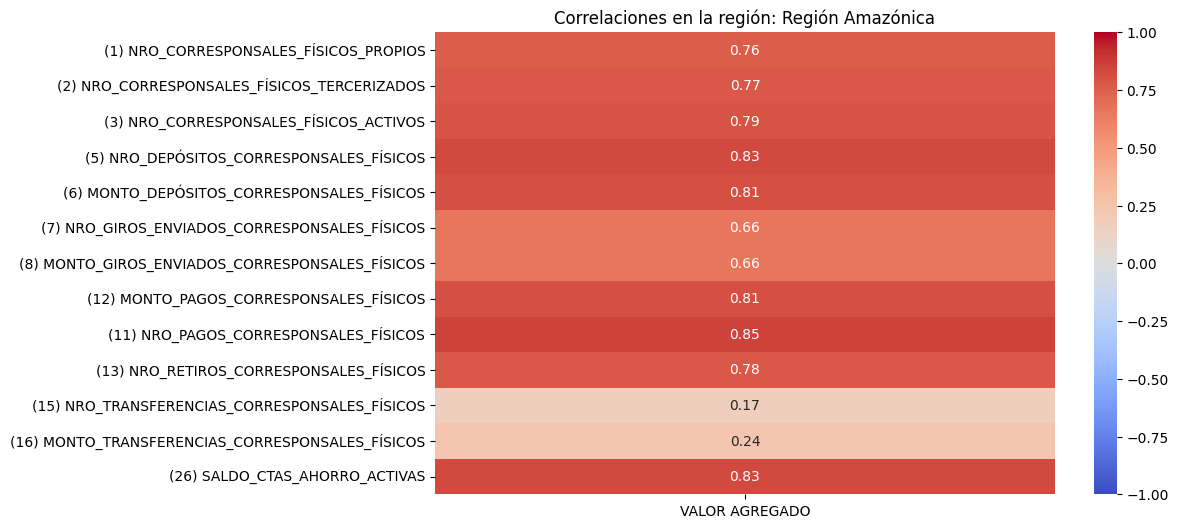

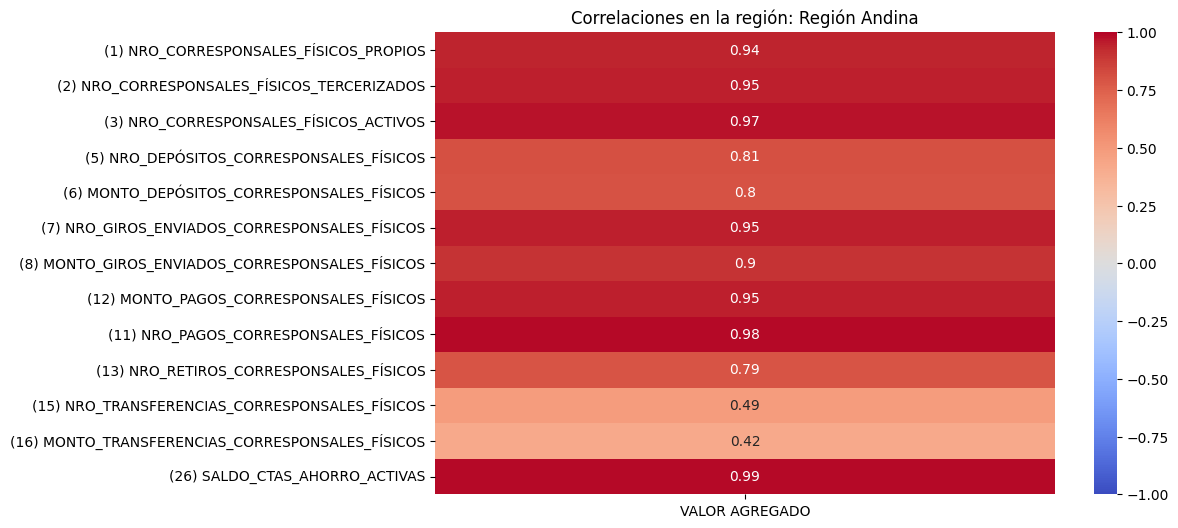

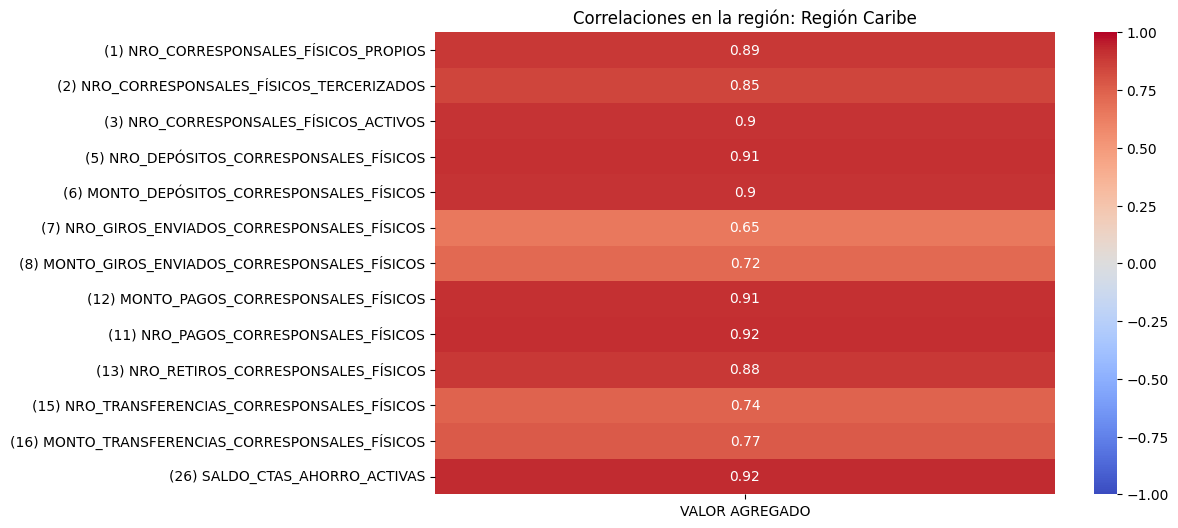

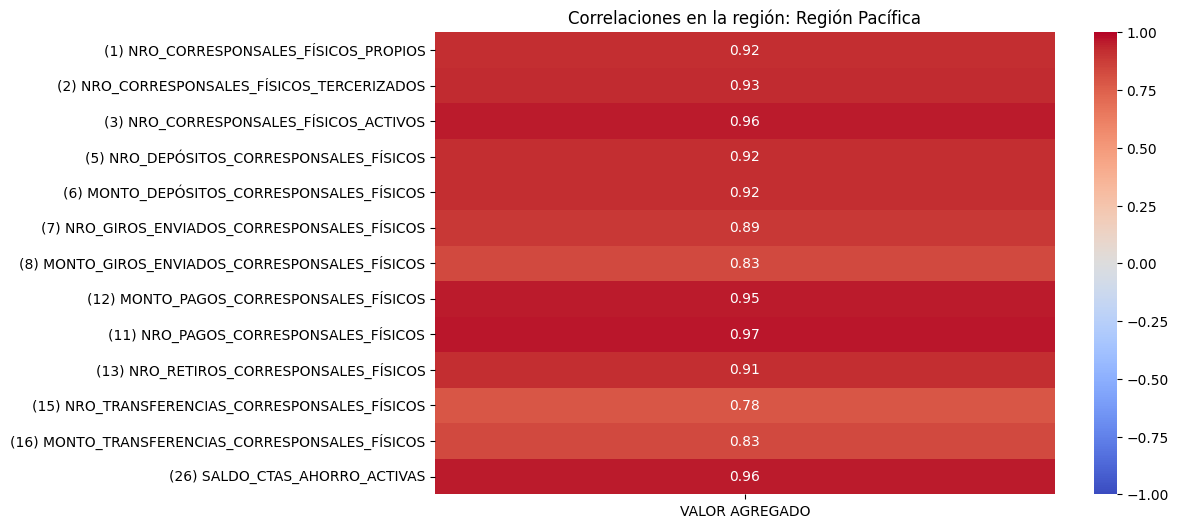

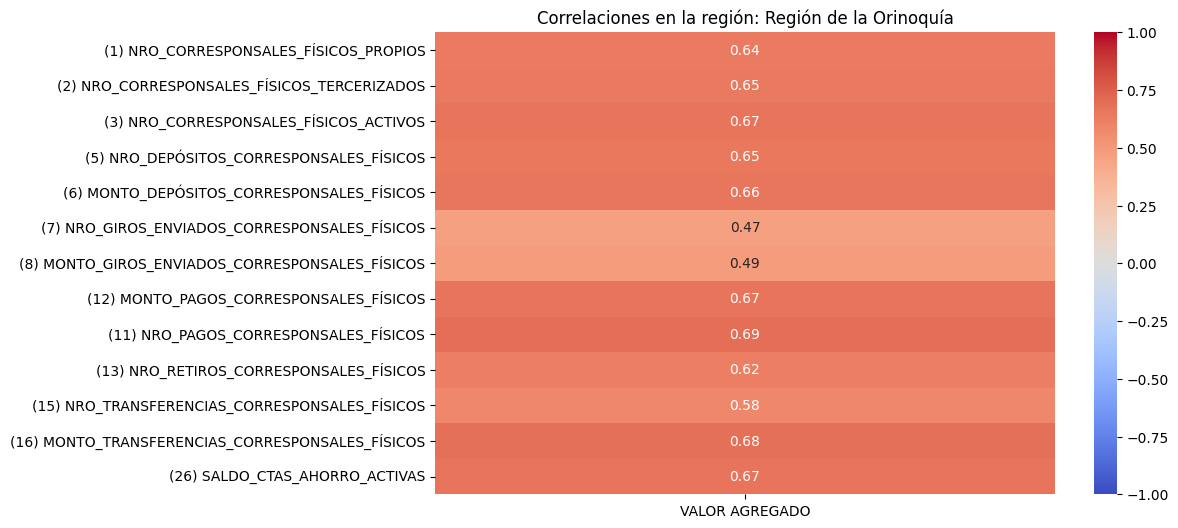

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

variables_independientes = [
    '(1) NRO_CORRESPONSALES_FÍSICOS_PROPIOS',
    '(2) NRO_CORRESPONSALES_FÍSICOS_TERCERIZADOS',
    '(3) NRO_CORRESPONSALES_FÍSICOS_ACTIVOS',
    '(5) NRO_DEPÓSITOS_CORRESPONSALES_FÍSICOS',
    '(6) MONTO_DEPÓSITOS_CORRESPONSALES_FÍSICOS',
    '(7) NRO_GIROS_ENVIADOS_CORRESPONSALES_FÍSICOS',
    '(8) MONTO_GIROS_ENVIADOS_CORRESPONSALES_FÍSICOS',
    '(12) MONTO_PAGOS_CORRESPONSALES_FÍSICOS',
    '(11) NRO_PAGOS_CORRESPONSALES_FÍSICOS',
    '(13) NRO_RETIROS_CORRESPONSALES_FÍSICOS',
    '(15) NRO_TRANSFERENCIAS_CORRESPONSALES_FÍSICOS',
    '(16) MONTO_TRANSFERENCIAS_CORRESPONSALES_FÍSICOS',
    '(26) SALDO_CTAS_AHORRO_ACTIVAS'
]

variable_dependiente = 'VALOR AGREGADO'

correlaciones_por_region = {}

for region, grupo_region in data.groupby('REGION'):
    correlacion = grupo_region[variables_independientes + [variable_dependiente]].corr()
    
    correlaciones_por_region[region] = correlacion[variable_dependiente].loc[variables_independientes]
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlaciones_por_region[region].to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlaciones en la región: {region}')
    plt.show()



En general, se evidencia una alta correlación entre las variables independientes y la variable dependiente. No obstante, la región de la Orinoquía es la que presenta la menor correlación con las variables analizadas.

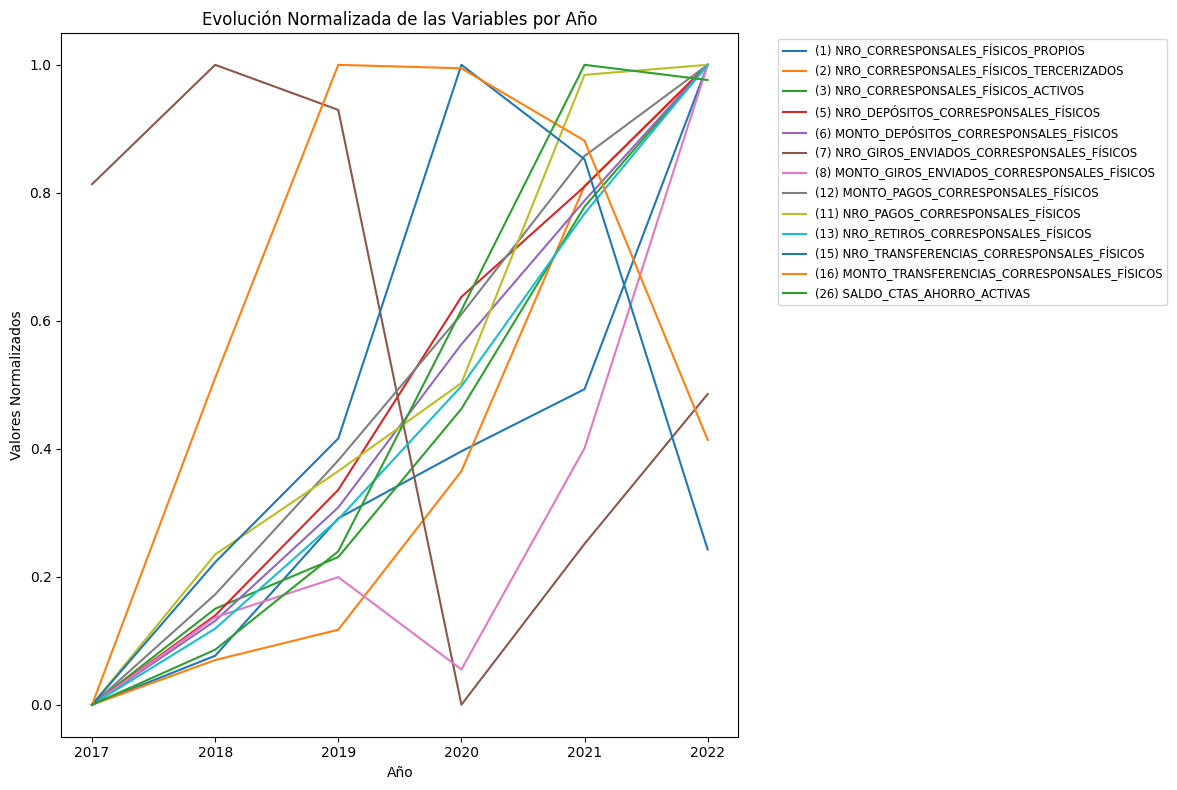

In [7]:
import matplotlib.pyplot as plt

variables = [
    '(1) NRO_CORRESPONSALES_FÍSICOS_PROPIOS',
    '(2) NRO_CORRESPONSALES_FÍSICOS_TERCERIZADOS',
    '(3) NRO_CORRESPONSALES_FÍSICOS_ACTIVOS',
    '(5) NRO_DEPÓSITOS_CORRESPONSALES_FÍSICOS',
    '(6) MONTO_DEPÓSITOS_CORRESPONSALES_FÍSICOS',
    '(7) NRO_GIROS_ENVIADOS_CORRESPONSALES_FÍSICOS',
    '(8) MONTO_GIROS_ENVIADOS_CORRESPONSALES_FÍSICOS',
    '(12) MONTO_PAGOS_CORRESPONSALES_FÍSICOS',
    '(11) NRO_PAGOS_CORRESPONSALES_FÍSICOS',
    '(13) NRO_RETIROS_CORRESPONSALES_FÍSICOS',
    '(15) NRO_TRANSFERENCIAS_CORRESPONSALES_FÍSICOS',
    '(16) MONTO_TRANSFERENCIAS_CORRESPONSALES_FÍSICOS',
    '(26) SALDO_CTAS_AHORRO_ACTIVAS'
]

# Agrupar los datos por año y sumar las variables seleccionadas
data_agrupada = data.groupby('AÑO')[variables].sum()

# Normalizar los valores por año usando Min-Max Scaling
data_normalizada = (data_agrupada - data_agrupada.min()) / (data_agrupada.max() - data_agrupada.min())

# Crear la figura y los ejes del gráfico
plt.figure(figsize=(12, 8))

# Graficar la suma normalizada de cada variable por año
for var in variables:
    plt.plot(data_normalizada.index, data_normalizada[var], label=var)

# Añadir título y etiquetas
plt.title('Evolución Normalizada de las Variables por Año')
plt.xlabel('Año')
plt.ylabel('Valores Normalizados')

# Añadir leyenda
plt.legend(loc='best', fontsize='small', bbox_to_anchor=(1.05, 1))

# Mostrar el gráfico
plt.tight_layout()
plt.show()


En la gráfica, observamos el comportamiento de nuestras variables dependientes a lo largo de los años. Es evidente un cambio abrupto en la mayoría de las variables durante el año de la pandemia.

### Regresion multivarida robusta

La idea de aplicar regresion multivariada robusta es para controlor los temas de homestacicidad del modelo de regresion multivariada ordinaria. 

In [8]:
variables_independientes = [
    '(1) NRO_CORRESPONSALES_FÍSICOS_PROPIOS',
    '(2) NRO_CORRESPONSALES_FÍSICOS_TERCERIZADOS',
    '(3) NRO_CORRESPONSALES_FÍSICOS_ACTIVOS',
    '(5) NRO_DEPÓSITOS_CORRESPONSALES_FÍSICOS',
    '(6) MONTO_DEPÓSITOS_CORRESPONSALES_FÍSICOS',
    '(7) NRO_GIROS_ENVIADOS_CORRESPONSALES_FÍSICOS',
    '(8) MONTO_GIROS_ENVIADOS_CORRESPONSALES_FÍSICOS',
    '(12) MONTO_PAGOS_CORRESPONSALES_FÍSICOS',
    '(11) NRO_PAGOS_CORRESPONSALES_FÍSICOS',
    '(13) NRO_RETIROS_CORRESPONSALES_FÍSICOS',
    '(15) NRO_TRANSFERENCIAS_CORRESPONSALES_FÍSICOS',
    '(16) MONTO_TRANSFERENCIAS_CORRESPONSALES_FÍSICOS',
    '(26) SALDO_CTAS_AHORRO_ACTIVAS'
    
]
variable_dependiente = 'VALOR AGREGADO'

#### LINEALIDAD

Uno de los supuestos clave que deben cumplir los modelos es el de la linealidad. Esto significa que la relación entre las variables independientes y la variable dependiente debe seguir un patrón lineal, es decir, la asociación entre ellas debe reflejarse en una correlación lineal. En términos prácticos, implica que los cambios en las variables independientes deben corresponder proporcionalmente a los cambios en la variable dependiente, manteniendo una pendiente constante.

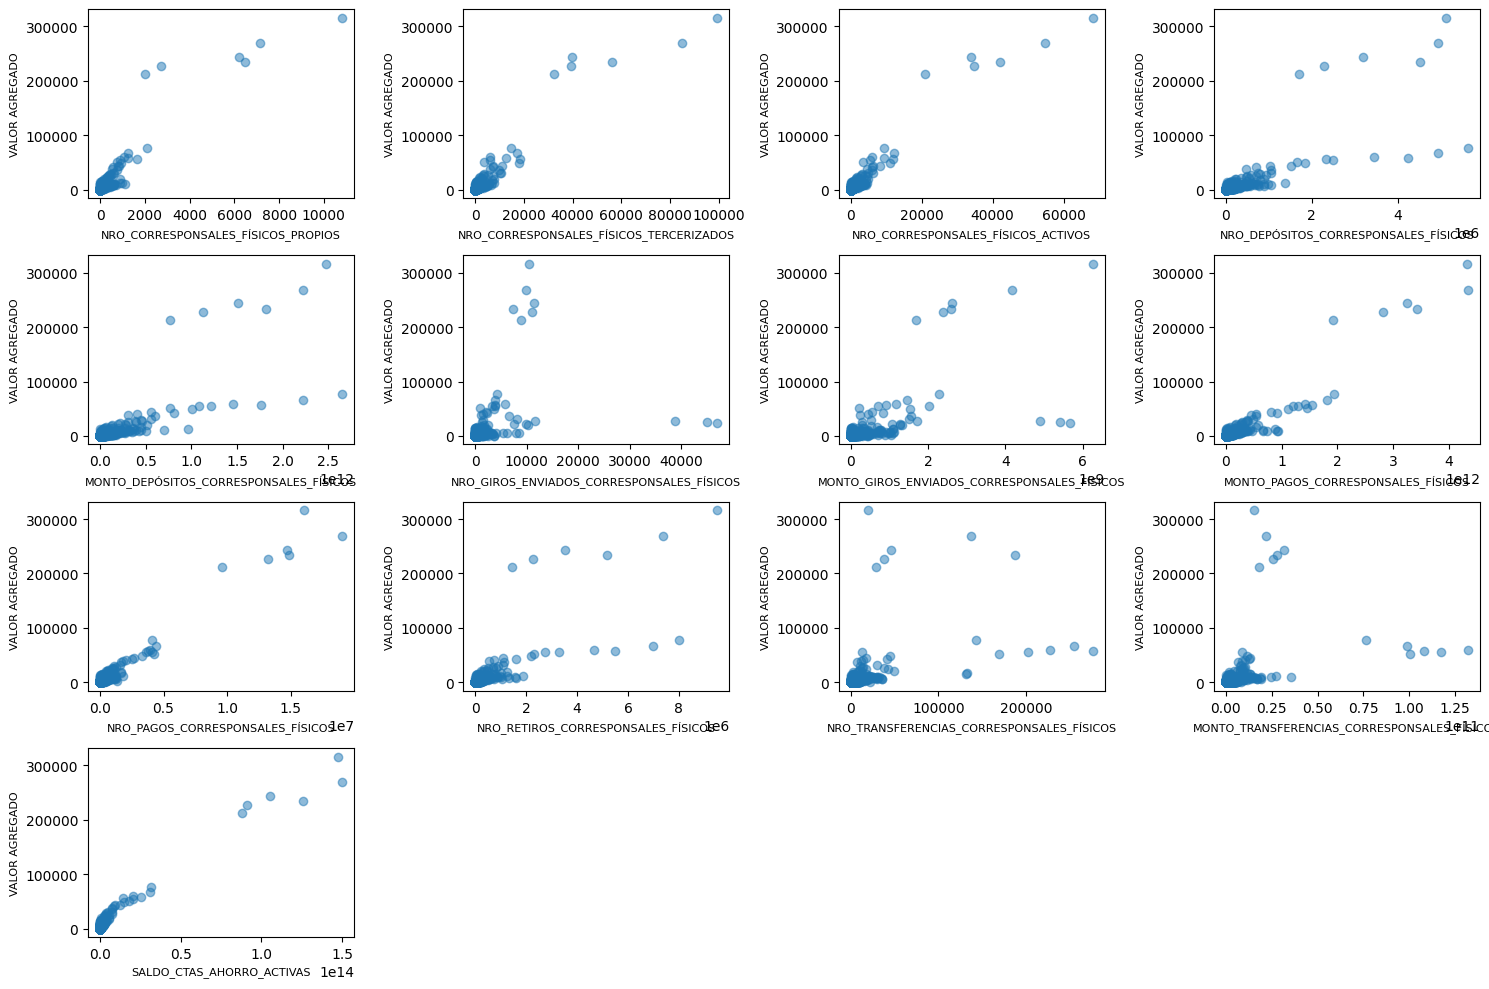

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

for i, var in enumerate(variables_independientes):
    plt.subplot(4, 4, i + 1)  
    plt.scatter(data[var], data[variable_dependiente], alpha=0.5)
    
    short_var = var.split(' ')[-1] 
    
    plt.xlabel(short_var, fontsize=8)
    plt.ylabel(variable_dependiente, fontsize=8)

plt.tight_layout()
plt.show()


Los graficos anteriores nos permite evidenciar que existe una correlacion lineal. 

#### MULTICOLINEALIDAD

La multicolinealidad es otro principio importante que los modelos de regresión multivariada deben tener en cuenta. En este caso, la correlación entre las variables independientes debe ser lo más baja posible para evitar redundancia en la información. Para evaluar esto, una matriz de correlación nos permite visualizar de manera general cómo se relacionan nuestras variables entre sí."

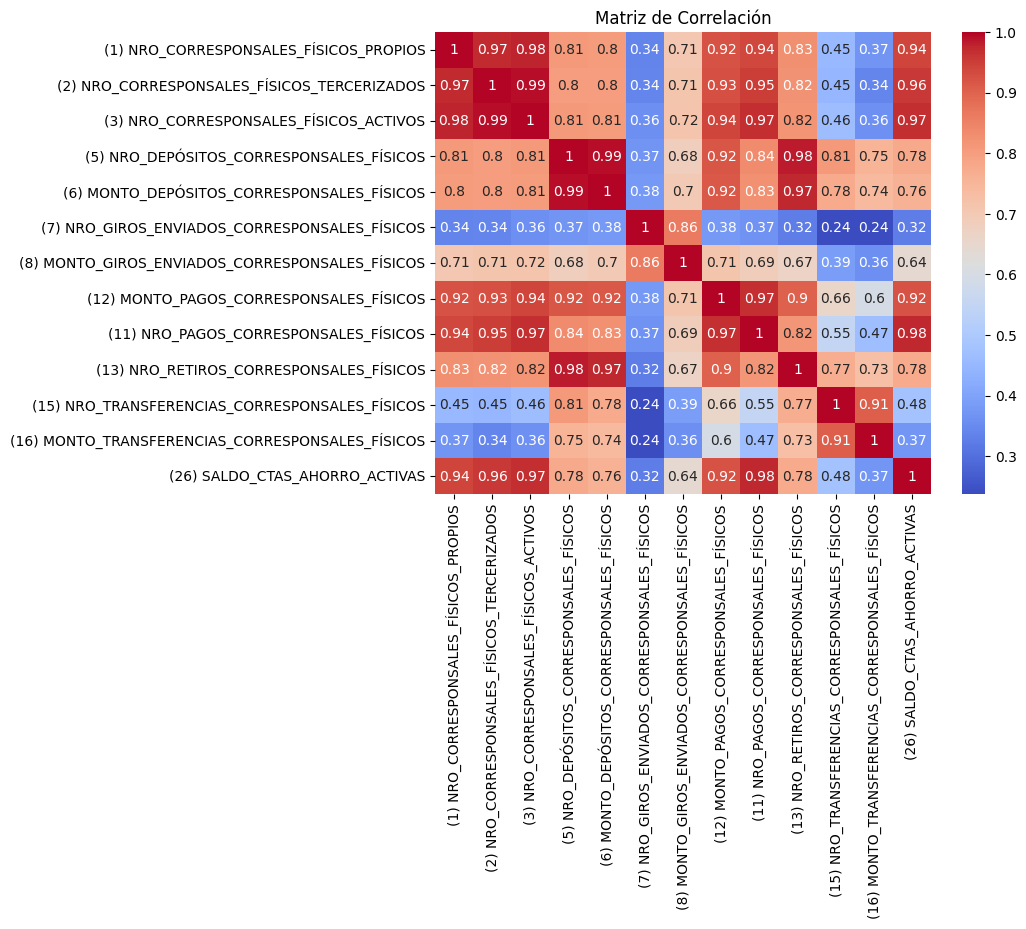

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data[variables_independientes].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Matriz de Correlación')
plt.show()


Observamos que la mayoría de las variables están correlacionadas entre sí; por lo tanto, seleccionaremos las más relevantes y combinaremos algunas de ellas.
Por otro lado obtendremos El VIF (Variance Inflation Factor) mide la multicolinealidad entre las variables independientes en un modelo de regresión. Un VIF alto indica que una variable está altamente correlacionada con otras, lo que puede distorsionar los resultados del modelo. Valores mayores a 5 o 10 sugieren que algunas variables deben eliminarse o combinarse para mejorar la precisión del modelo.

In [11]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm  # Esta es la importación que falta


X = data[variables_independientes]

X = sm.add_constant(X)

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


                                            Variable         VIF
0                                              const    0.000000
1             (1) NRO_CORRESPONSALES_FÍSICOS_PROPIOS   29.024623
2        (2) NRO_CORRESPONSALES_FÍSICOS_TERCERIZADOS  155.362965
3             (3) NRO_CORRESPONSALES_FÍSICOS_ACTIVOS  211.618410
4           (5) NRO_DEPÓSITOS_CORRESPONSALES_FÍSICOS  262.180247
5         (6) MONTO_DEPÓSITOS_CORRESPONSALES_FÍSICOS  135.440995
6      (7) NRO_GIROS_ENVIADOS_CORRESPONSALES_FÍSICOS   17.897613
7    (8) MONTO_GIROS_ENVIADOS_CORRESPONSALES_FÍSICOS   35.164523
8            (12) MONTO_PAGOS_CORRESPONSALES_FÍSICOS   51.734443
9              (11) NRO_PAGOS_CORRESPONSALES_FÍSICOS   86.892751
10           (13) NRO_RETIROS_CORRESPONSALES_FÍSICOS   95.847986
11    (15) NRO_TRANSFERENCIAS_CORRESPONSALES_FÍSICOS   10.254667
12  (16) MONTO_TRANSFERENCIAS_CORRESPONSALES_FÍSICOS   11.666362
13                    (26) SALDO_CTAS_AHORRO_ACTIVAS   45.052454


c:\Users\santi\OneDrive\Escritorio\projects\econometria\venv\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dado el nivel tal alto del VIF y la la alta correlacion de algunas variables, se procede hacer lo siguiente

- Se creara una unica varible que se llame ' TOTAL DE CORRESPONSALES FISICOS' en la que sume las variables 
    - (1) NRO_CORRESPONSALES_FÍSICOS_PROPIOS   
    - (2) NRO_CORRESPONSALES_FÍSICOS_TERCERIZADOS  
    - (3) NRO_CORRESPONSALES_FÍSICOS_ACTIVOS  

Dejaremos las variables que presenten mayor importancia para nuestro analisis.

In [12]:

data['VOLUMEN_TRANSACCIONES_CORRE_FISICOS'] = data['(6) MONTO_DEPÓSITOS_CORRESPONSALES_FÍSICOS'] + data['(12) MONTO_PAGOS_CORRESPONSALES_FÍSICOS']


In [13]:
variables_independientes = ['VOLUMEN_TRANSACCIONES_CORRE_FISICOS',
    '(8) MONTO_GIROS_ENVIADOS_CORRESPONSALES_FÍSICOS',
    '(16) MONTO_TRANSFERENCIAS_CORRESPONSALES_FÍSICOS',
    '(26) SALDO_CTAS_AHORRO_ACTIVAS'    
]

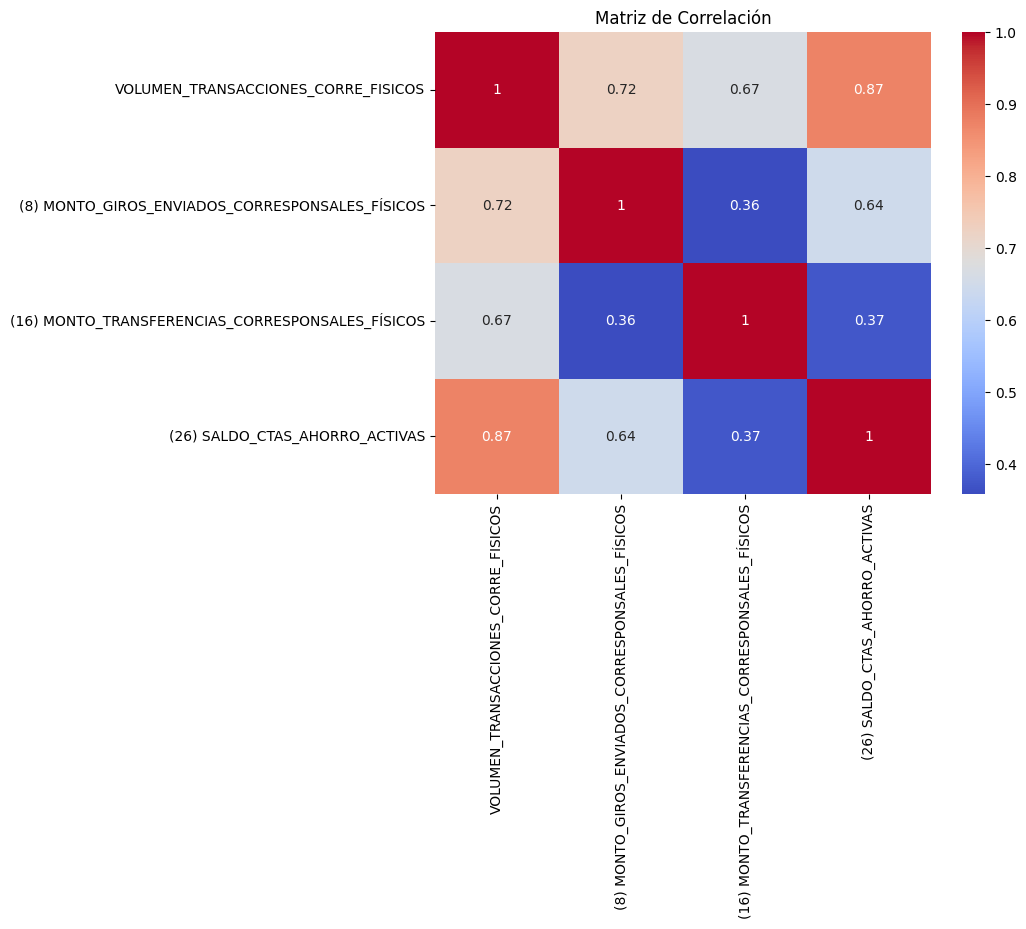

In [14]:


corr_matrix = data[variables_independientes].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Matriz de Correlación')
plt.show()


In [15]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm  # Esta es la importación que falta


# Asumiendo que tu DataFrame se llama 'data'
X = data[variables_independientes]

# Añadir una constante para el cálculo del VIF
X = sm.add_constant(X)

# Calcular el VIF para cada variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar los resultados del VIF
print(vif)


                                           Variable        VIF
0                                             const   0.000000
1               VOLUMEN_TRANSACCIONES_CORRE_FISICOS  12.773100
2   (8) MONTO_GIROS_ENVIADOS_CORRESPONSALES_FÍSICOS   2.254781
3  (16) MONTO_TRANSFERENCIAS_CORRESPONSALES_FÍSICOS   2.941915
4                    (26) SALDO_CTAS_AHORRO_ACTIVAS   6.517018


c:\Users\santi\OneDrive\Escritorio\projects\econometria\venv\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [16]:
def asignar_categoria(categoria):
    if categoria in [0, 1, 2,3]:
        return 'Grupo 1'
    else:
        return 'Grupo 2'

# Aplicar la función para crear la nueva columna
data['NUEVA_CATEGORIA'] = data['CATEGORIA'].apply(asignar_categoria)


Observamos que nuestras variables independientes presentan una baja correlación, lo cual se refleja tanto en la matriz de correlación como en los valores del VIF.

In [17]:
variables_independientes = ['VOLUMEN_TRANSACCIONES_CORRE_FISICOS',
    '(8) MONTO_GIROS_ENVIADOS_CORRESPONSALES_FÍSICOS',
    '(16) MONTO_TRANSFERENCIAS_CORRESPONSALES_FÍSICOS',
    '(26) SALDO_CTAS_AHORRO_ACTIVAS',
    'NUEVA_CATEGORIA'
]

In [18]:
# Import necessary packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm  # This is for using OLS regression with robust standard errors

# Variables independientes y dependientes (X, y)
X = data[variables_independientes]  # Excluir la variable objetivo
y = data['VALOR AGREGADO']

# Convertir la variable categórica 'NUEVA_CATEGORIA' en variables dummy
X = pd.get_dummies(X, columns=['NUEVA_CATEGORIA'], drop_first=True)

# Escalar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).ravel()

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Add constant to the model (for intercept)
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fitting the model using OLS (ordinary least squares)
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Apply robust standard errors (Heteroscedasticity-consistent standard errors, HC3)
robust_model = ols_model.get_robustcov_results(cov_type='HC3')  # HC3 is a common choice for robust covariance

# Predictions on the test set
y_pred_sm = robust_model.predict(X_test_sm)

# Invertir la escala de y para interpretar los resultados
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()
y_pred_original = scaler.inverse_transform(y_pred_sm.reshape(-1, 1)).ravel()

# Evaluación del modelo
mse = mean_squared_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

# Ver los coeficientes del modelo
coef_df = pd.DataFrame(robust_model.params, index=['const'] + X.columns.tolist(), columns=['Coeficiente'])
print(coef_df)

# Verificar los errores estándar robustos
robust_se_df = pd.DataFrame(robust_model.bse, index=['const'] + X.columns.tolist(), columns=['Errores Estándar Robustos'])
print(robust_se_df)

# Resultados del modelo robusto
print(robust_model.summary())


Error cuadrático medio (MSE): 639560.8639020419
Coeficiente de determinación (R²): 0.8717336437470805
                                                  Coeficiente
const                                                0.001351
VOLUMEN_TRANSACCIONES_CORRE_FISICOS                  0.092710
(8) MONTO_GIROS_ENVIADOS_CORRESPONSALES_FÍSICOS      0.070954
(16) MONTO_TRANSFERENCIAS_CORRESPONSALES_FÍSICOS     0.010154
(26) SALDO_CTAS_AHORRO_ACTIVAS                       0.834114
NUEVA_CATEGORIA_Grupo 2                             -0.074134
                                                  Errores Estándar Robustos
const                                                              0.002393
VOLUMEN_TRANSACCIONES_CORRE_FISICOS                                0.088937
(8) MONTO_GIROS_ENVIADOS_CORRESPONSALES_FÍSICOS                    0.017393
(16) MONTO_TRANSFERENCIAS_CORRESPONSALES_FÍSICOS                   0.036190
(26) SALDO_CTAS_AHORRO_ACTIVAS                                     0.098754
NUEVA_CA


### 1. **Error Cuadrático Medio (MSE)**: 
   - **639560.86**: Este valor representa el **promedio de los cuadrados de los errores** (las diferencias entre los valores observados y los predichos por el modelo). Un valor más bajo de MSE indica un mejor ajuste del modelo. En este caso, 639560 es el promedio de los errores al cuadrado.

### 2. **Coeficiente de Determinación (R²)**:
   - **0.8717**: El **R²** indica la proporción de la variabilidad en la variable dependiente (`VALOR AGREGADO`) que es explicada por las variables independientes. Un R² de 0.87 significa que el 87% de la variabilidad en `VALOR AGREGADO` se explica por el modelo. Este es un ajuste bastante bueno.

### 3. **Interpretación de los Coeficientes**:
   - **const (0.001351)**: El coeficiente de la constante o intercepto es 0.0013, lo que significa que cuando todas las variables independientes son cero, el valor esperado de `VALOR AGREGADO` es aproximadamente 0.0013. 
   
   - **VOLUMEN_TRANSACCIONES_CORRE_FISICOS (0.092710)**: Este coeficiente indica que por cada aumento de una unidad en el volumen de transacciones en corresponsales físicos, se espera un aumento de 0.0927 unidades en `VALOR AGREGADO`, manteniendo todo lo demás constante.
   
   - **(8) MONTO_GIROS_ENVIADOS_CORRESPONSALES_FÍSICOS (0.070954)**: Por cada aumento de una unidad en el monto de los giros enviados por corresponsales físicos, se espera un aumento de 0.071 en `VALOR AGREGADO`, manteniendo todo lo demás constante.

   - **(16) MONTO_TRANSFERENCIAS_CORRESPONSALES_FÍSICOS (0.010154)**: Por cada aumento de una unidad en el monto de las transferencias realizadas por corresponsales físicos, se espera un aumento de 0.0102 en `VALOR AGREGADO`.
   
   - **(26) SALDO_CTAS_AHORRO_ACTIVAS (0.834114)**: Este coeficiente indica que por cada unidad adicional en el saldo de las cuentas de ahorro activas, el valor agregado aumenta significativamente, en 0.8341 unidades, lo cual parece ser el efecto más fuerte de todas las variables.

   - **NUEVA_CATEGORIA_Grupo 2 (-0.074134)**: Este coeficiente negativo indica que pertenecer al grupo 2 de la nueva categoría está asociado con una reducción de 0.0741 en `VALOR AGREGADO`, en comparación con el grupo de referencia.

### 4. **Errores Estándar Robustos**:
   - Los errores estándar que se muestran han sido corregidos para la heteroscedasticidad utilizando el método robusto de **HC3**, lo que significa que las estimaciones de los errores estándar no dependen de la suposición de homocedasticidad (varianza constante de los errores). Estos errores estándar robustos son útiles si hay preocupaciones sobre la presencia de heteroscedasticidad en los residuos del modelo.

   - Por ejemplo, el error estándar robusto para el coeficiente de `VOLUMEN_TRANSACCIONES_CORRE_FISICOS` es **0.088937**, lo que te ayuda a interpretar la precisión de la estimación.

### 5. **Estadísticas Globales del Modelo**:
   - **R² ajustado (0.975)**: El R² ajustado toma en cuenta el número de predictores en el modelo y también es 0.975, lo que refuerza que el modelo está ajustando muy bien los datos.
   
   - **F-statistic (349.9)** y **Prob (F-statistic) = 0.00**: El valor de la estadística F indica que el modelo en conjunto es significativo. Dado que la probabilidad asociada a la F es 0, el modelo globalmente es altamente significativo.

### Conclusión:
Este modelo de regresión lineal ajusta bastante bien los datos, explicando un 87% de la variación en `VALOR AGREGADO` con un error cuadrático medio moderado. Los coeficientes de las variables indican que variables como `SALDO_CTAS_AHORRO_ACTIVAS` tienen un impacto considerable en el valor agregado, mientras que otras variables como `NUEVA_CATEGORIA_Grupo 2` tienen un impacto negativo. Los errores estándar robustos indican que el modelo ha sido corregido para posibles problemas de heteroscedasticidad, proporcionando coeficientes más confiables.

### MODELO 2

Evaluar las relaciones entre las variables de inclusión financiera y los indicadores de gestión de finanzas personales. En este caso clasificamos las variables que pueden tener correlacion con las finanzas personales de las personas y las comparamos con las de variables de inclusion financiera 

In [19]:
variables_inclusion_financiera = [
    '(25) NRO_CTAS_AHORRO_ACTIVAS',
    '(26) SALDO_CTAS_AHORRO_ACTIVAS',
    '(4) NRO_CORRESPONSALES_FÍSICOS',
    '(6) MONTO_DEPÓSITOS_CORRESPONSALES_FÍSICOS',
    '(11) NRO_PAGOS_CORRESPONSALES_FÍSICOS'
    ]

variables_finanzas_personales = [
    '(75) NRO_MICROCRÉDITO',
    '(45) NRO_CRÉDITO_CONSUMO',
    '(46) MONTO_CRÉDITO_CONSUMO',
    '(57) NRO_CRÉDITO_VIVIENDA',
    '(41) NRO_CRÉDITO_CONSUMO_MUJERES',
    '(43) NRO_CRÉDITO_CONSUMO_HOMBRES',
    '(71) NRO_MICROCRÉDITO_MUJERES',
    '(73) NRO_MICROCRÉDITO_HOMBRES'
]


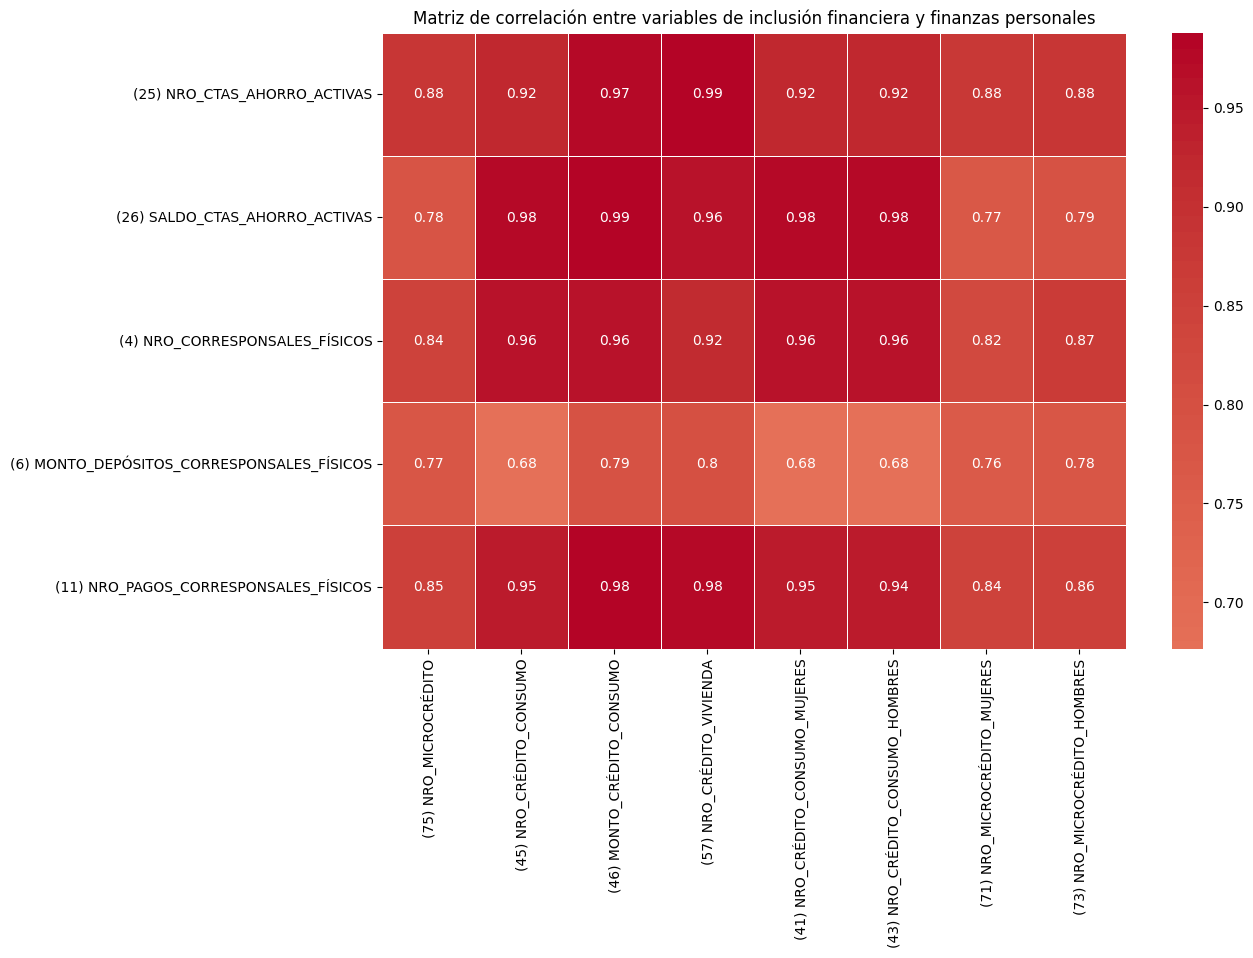

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_inclusion_financiera = data[variables_inclusion_financiera]
df_finanzas_personales = data[variables_finanzas_personales]

correlation_matrix = pd.DataFrame(index=variables_inclusion_financiera, columns=variables_finanzas_personales)

for col_fin in variables_finanzas_personales:
    for col_inc in variables_inclusion_financiera:
        correlation_matrix.loc[col_inc, col_fin] = df_inclusion_financiera[col_inc].corr(df_finanzas_personales[col_fin])

correlation_matrix = correlation_matrix.astype(float)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Matriz de correlación entre variables de inclusión financiera y finanzas personales")
plt.show()


En geneal vimos una alta correlacion entre estas dos categorias.

### Modelo 3

En este ultimo modelo, determinamos la relacion de las variables de inclusion financiera y el numero de empresas creadas. 

In [21]:
variables_inclusion_financiera = [
    '(25) NRO_CTAS_AHORRO_ACTIVAS',
    '(4) NRO_CORRESPONSALES_FÍSICOS',
    '(11) NRO_PAGOS_CORRESPONSALES_FÍSICOS',
    '(75) NRO_MICROCRÉDITO',
    '(45) NRO_CRÉDITO_CONSUMO',
    '(57) NRO_CRÉDITO_VIVIENDA',
    '(41) NRO_CRÉDITO_CONSUMO_MUJERES',
    '(43) NRO_CRÉDITO_CONSUMO_HOMBRES',
    '(71) NRO_MICROCRÉDITO_MUJERES',
    '(73) NRO_MICROCRÉDITO_HOMBRES'
    ]

variables_finanzas_personales = ['CANTIDAD DE EMPRESAS ']

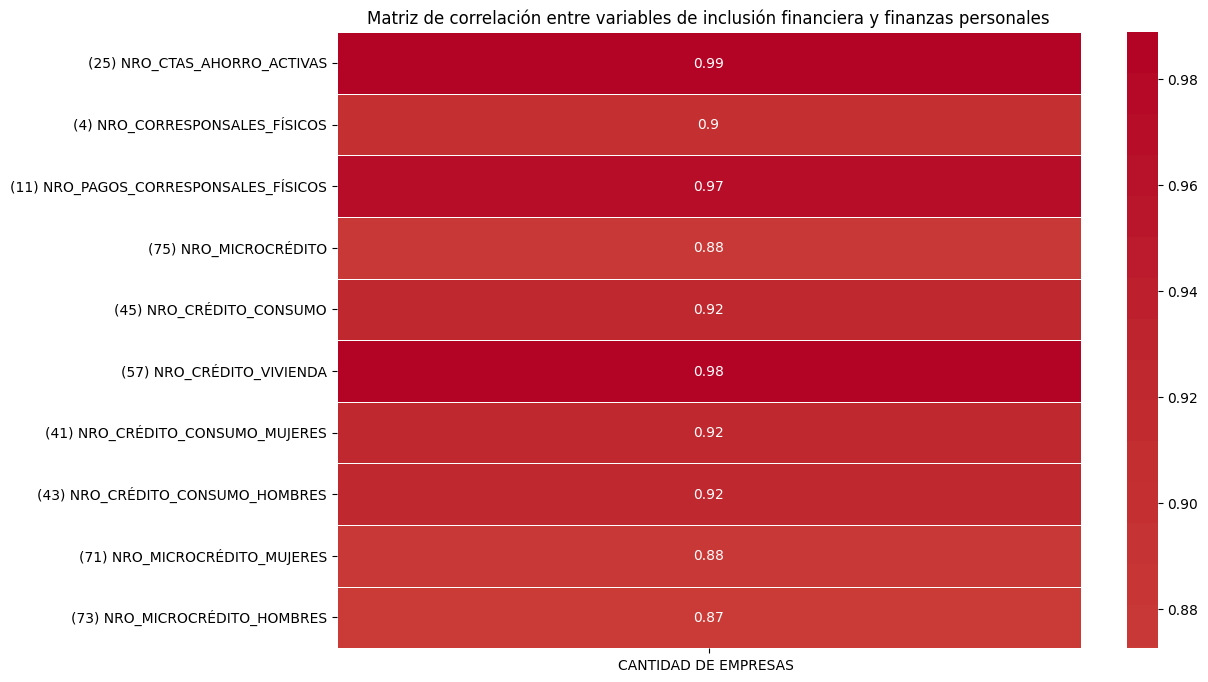

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_inclusion_financiera = data[variables_inclusion_financiera]
df_finanzas_personales = data[variables_finanzas_personales]

correlation_matrix = pd.DataFrame(index=variables_inclusion_financiera, columns=variables_finanzas_personales)

for col_fin in variables_finanzas_personales:
    for col_inc in variables_inclusion_financiera:
        correlation_matrix.loc[col_inc, col_fin] = df_inclusion_financiera[col_inc].corr(df_finanzas_personales[col_fin])

# Convertir la matriz a tipo float
correlation_matrix = correlation_matrix.astype(float)

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Matriz de correlación entre variables de inclusión financiera y finanzas personales")
plt.show()


Primeramente, vemos que existe una alta correalcion entre las variables de inclusion financiera y la creacion de empresas. 

In [23]:
variables_inclusion_financiera = [
    '(25) NRO_CTAS_AHORRO_ACTIVAS',
    '(4) NRO_CORRESPONSALES_FÍSICOS',
    '(11) NRO_PAGOS_CORRESPONSALES_FÍSICOS',
    '(75) NRO_MICROCRÉDITO',
    '(45) NRO_CRÉDITO_CONSUMO',
    '(57) NRO_CRÉDITO_VIVIENDA',
    '(41) NRO_CRÉDITO_CONSUMO_MUJERES',
    '(43) NRO_CRÉDITO_CONSUMO_HOMBRES',
    '(71) NRO_MICROCRÉDITO_MUJERES',
    '(73) NRO_MICROCRÉDITO_HOMBRES'
]

#### Linealidad

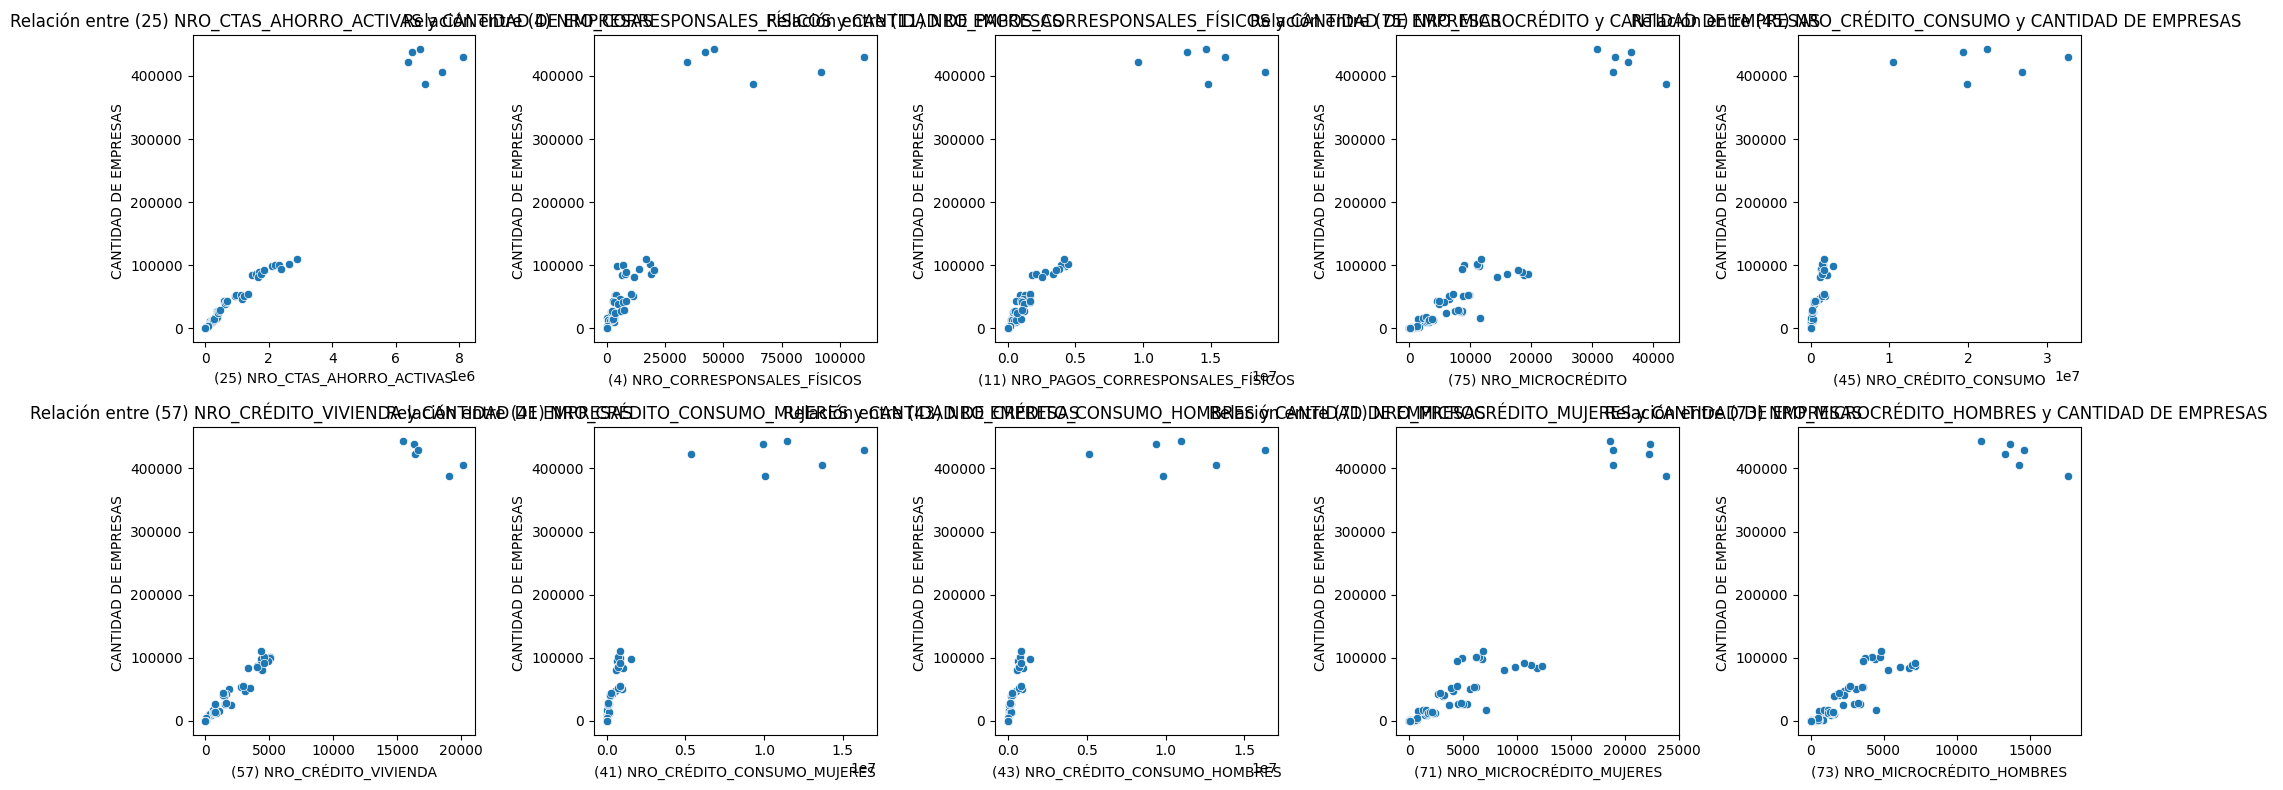

In [24]:


df_inclusion_financiera = data.groupby(['CODIGO DANE', 'AÑO']).first().reset_index()

variables_inclusion_financiera = [
    '(25) NRO_CTAS_AHORRO_ACTIVAS',
    '(4) NRO_CORRESPONSALES_FÍSICOS',
    '(11) NRO_PAGOS_CORRESPONSALES_FÍSICOS',
    '(75) NRO_MICROCRÉDITO',
    '(45) NRO_CRÉDITO_CONSUMO',
    '(57) NRO_CRÉDITO_VIVIENDA',
    '(41) NRO_CRÉDITO_CONSUMO_MUJERES',
    '(43) NRO_CRÉDITO_CONSUMO_HOMBRES',
    '(71) NRO_MICROCRÉDITO_MUJERES',
    '(73) NRO_MICROCRÉDITO_HOMBRES'
]
variable_dependiente = 'CANTIDAD DE EMPRESAS '  

df_inclusion_financiera = df_inclusion_financiera.dropna(subset=variables_inclusion_financiera + [variable_dependiente])

n_cols = 5
n_vars = len(variables_inclusion_financiera)
n_rows = np.ceil(n_vars / n_cols).astype(int)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()  

for i, variable in enumerate(variables_inclusion_financiera):
    sns.scatterplot(x=df_inclusion_financiera[variable], y=df_inclusion_financiera[variable_dependiente], ax=axes[i])
    axes[i].set_title(f"Relación entre {variable} y {variable_dependiente}")
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel(variable_dependiente)

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Ver la correlacion lineal entre mis variables de inclusion financiera y el numero de empresas creadas.

In [25]:
variables_inclusion_financiera = [
    '(25) NRO_CTAS_AHORRO_ACTIVAS',
    '(4) NRO_CORRESPONSALES_FÍSICOS',
    '(11) NRO_PAGOS_CORRESPONSALES_FÍSICOS',
    '(75) NRO_MICROCRÉDITO',
    '(45) NRO_CRÉDITO_CONSUMO',
    '(57) NRO_CRÉDITO_VIVIENDA',
    ]

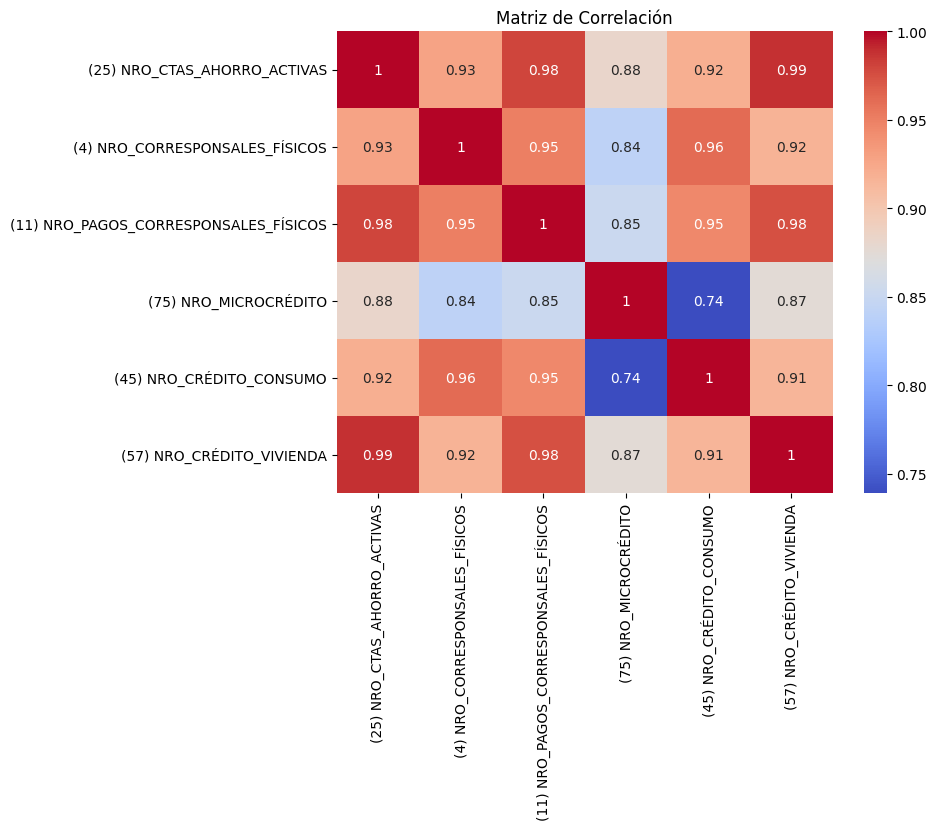

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'df' es tu DataFrame con las variables independientes
corr_matrix = data[variables_inclusion_financiera].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Matriz de Correlación')
plt.show()


In [27]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assume your DataFrame is named 'data'
# Step 1: Check VIF for multicollinearity
X = data[['(25) NRO_CTAS_AHORRO_ACTIVAS',
           '(11) NRO_PAGOS_CORRESPONSALES_FÍSICOS', 
           '(75) NRO_MICROCRÉDITO',
           '(45) NRO_CRÉDITO_CONSUMO', 
           '(57) NRO_CRÉDITO_VIVIENDA']]
y = data['CANTIDAD DE EMPRESAS ']

# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Step 2: Drop variables or combine based on VIF results if necessary
vif_data = calculate_vif(X)
print("VIF Data:\n", vif_data)

# Step 3: Encoding categorical variables
data['CATEGORIA'] = data['CATEGORIA'].astype(str)  # Convert to string type
X['CATEGORIA'] = data['CATEGORIA']
X_encoded = pd.get_dummies(X, columns=['CATEGORIA'], drop_first=True)  # One-hot encoding

# Step 4: Iterate through each category in 'CATEGORIA'
for categoria in data['CATEGORIA'].unique():
    print(f"\nProcessing category: {categoria}")
    
    cat_column = 'CATEGORIA_' + str(categoria)  # Ensure categoria is treated as a string
    if cat_column not in X_encoded.columns:
        print(f"Category '{categoria}' not found in encoded features.")
        continue
    
    X_cat = X_encoded[X_encoded[cat_column] == 1].drop(columns=[cat_column])
    y_cat = y[X_encoded[cat_column] == 1]

    # Check if there's sufficient data for PCA
    if len(y_cat) < 2 or X_cat.shape[1] <= 1:
        print(f"Not enough data for category '{categoria}' for PCA.")
        continue

    # Standardize the data before PCA
    scaler = StandardScaler()
    X_cat_scaled = scaler.fit_transform(X_cat)

    # Apply PCA
    pca = PCA(n_components=min(X_cat_scaled.shape)-1)  # Use min(n_samples, n_features) - 1
    X_cat_pca = pca.fit_transform(X_cat_scaled)

    # Step 5: Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_cat_pca, y_cat, test_size=0.2, random_state=42)

    # Step 6: Fit a Ridge Regression model
    ridge_model = Ridge(alpha=1.0)  # Regularization parameter
    ridge_model.fit(X_train, y_train)

    # Step 7: Evaluate the model
    train_score = ridge_model.score(X_train, y_train)
    test_score = ridge_model.score(X_test, y_test)
    display(f"Train Score: {train_score:.4f}")
    display(f"Test Score: {test_score:.4f}")

    # Optional: Print PCA components and explained variance
    display(f"Explained variance by PCA components: {pca.explained_variance_ratio_}")


VIF Data:
                                  feature        VIF
0           (25) NRO_CTAS_AHORRO_ACTIVAS  60.036911
1  (11) NRO_PAGOS_CORRESPONSALES_FÍSICOS  38.536831
2                  (75) NRO_MICROCRÉDITO   5.296772
3               (45) NRO_CRÉDITO_CONSUMO  11.130095
4              (57) NRO_CRÉDITO_VIVIENDA  43.618839

Processing category: 4


C:\Users\santi\AppData\Local\Temp\ipykernel_20992\2772130039.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['CATEGORIA'] = data['CATEGORIA']


'Train Score: 0.7696'

'Test Score: 0.6477'

'Explained variance by PCA components: [0.74938411 0.09224109 0.06761883 0.05863123 0.03212475 0.\n 0.         0.         0.        ]'


Processing category: 0
Category '0' not found in encoded features.

Processing category: 6


'Train Score: 0.7205'

'Test Score: 0.7003'

'Explained variance by PCA components: [0.54929258 0.19207973 0.12702723 0.09695403 0.03464643 0.\n 0.         0.         0.        ]'


Processing category: 3


'Train Score: 0.9156'

'Test Score: 0.9107'

'Explained variance by PCA components: [0.79930768 0.09727857 0.05558794 0.02671491 0.02111091 0.\n 0.         0.         0.        ]'


Processing category: 1


'Train Score: 0.8943'

'Test Score: 0.7887'

'Explained variance by PCA components: [0.74828754 0.1012617  0.09868446 0.041404   0.01036229 0.\n 0.         0.         0.        ]'


Processing category: 5


'Train Score: 0.7666'

'Test Score: 0.7421'

'Explained variance by PCA components: [0.65270529 0.11862248 0.09871098 0.0931585  0.03680275 0.\n 0.         0.         0.        ]'


Processing category: 2


'Train Score: 0.7833'

'Test Score: 0.7607'

'Explained variance by PCA components: [0.69315416 0.14570811 0.07828037 0.06967224 0.01318512 0.\n 0.         0.         0.        ]'

El análisis se centrará en dos aspectos clave: el uso de **PCA (Análisis de Componentes Principales)** para reducir la dimensionalidad y el ajuste del **modelo de regresión Ridge (Lasso no fue mencionado en el código actual)**, además de la relación entre las variables de inclusión financiera y la creación de empresas.

### 1. **¿Por qué es adecuado el modelo de regresión Ridge combinado con PCA?**
   - **Multicolinealidad**: Según el cálculo de **VIF (Variance Inflation Factor)**, hay una alta multicolinealidad entre varias variables (por ejemplo, el VIF para *NRO_CTAS_AHORRO_ACTIVAS* es 60.03, lo que es muy elevado). La multicolinealidad puede afectar negativamente a los modelos de regresión, por lo que es necesario reducirla. Aplicar PCA ayuda a reducir esta correlación entre variables, transformando el conjunto original en componentes ortogonales (no correlacionados).
   - **Ridge Regression**: Ridge es un modelo adecuado cuando hay multicolinealidad, ya que añade un término de penalización a los coeficientes para reducir su magnitud, lo que ayuda a mejorar la estabilidad y la generalización del modelo.

### 2. **¿Cómo funciona el PCA (Análisis de Componentes Principales)?**
   - PCA transforma tus variables originales en nuevas **componentes principales** que son combinaciones lineales de las variables originales, y estas componentes son ortogonales entre sí. En este caso, los componentes principales se seleccionan en función de cuánta **varianza** explican en los datos.
   - Por ejemplo, para la categoría **4**, la primera componente principal explica el **74.94%** de la varianza, lo que significa que la mayoría de la información relevante para predecir la variable objetivo se captura en esta primera componente. Esto sugiere que muchas de las variables originales están fuertemente correlacionadas y pueden resumirse eficazmente en menos componentes, lo cual es positivo en términos de reducir la complejidad del modelo.

### 3. **Interpretación del rendimiento del modelo por categoría (departamentos)**

- **Categoría 4**:
   - **Train Score: 0.7696, Test Score: 0.6477**
   - **Explained variance by PCA**: La primera componente explica casi el 75% de la varianza. El rendimiento en el conjunto de prueba es más bajo que en el de entrenamiento, lo que podría sugerir algo de **sobreajuste**. Sin embargo, el modelo aún generaliza de manera razonable.

- **Categoría 6**:
   - **Train Score: 0.7205, Test Score: 0.7003**
   - Aquí se ve que tanto el entrenamiento como la prueba son cercanos, lo que indica un buen equilibrio. El modelo está capturando la estructura del conjunto de datos de manera consistente. La primera componente principal explica **54.92%** de la varianza, lo que indica que otras componentes también aportan información relevante.

- **Categoría 3**:
   - **Train Score: 0.9156, Test Score: 0.9107**
   - Excelente rendimiento tanto en entrenamiento como en prueba. El modelo es capaz de generalizar de manera muy eficiente en este grupo. La primera componente explica **79.93%** de la varianza, lo que sugiere que la mayoría de la información relevante está concentrada en esta componente.

- **Categoría 1**:
   - **Train Score: 0.8943, Test Score: 0.7887**
   - Buen ajuste, aunque el rendimiento en prueba es algo menor. La primera componente explica **74.82%** de la varianza, lo que también indica que esta primera componente principal tiene un peso significativo en este grupo.

- **Categoría 5**:
   - **Train Score: 0.7666, Test Score: 0.7421**
   - Rendimiento equilibrado, donde la primera componente explica **65.27%** de la varianza. Este es un buen resultado, pues se mantiene una generalización adecuada.

- **Categoría 2**:
   - **Train Score: 0.7833, Test Score: 0.7607**
   - El modelo se ajusta bien, con una varianza explicada del **69.31%** por la primera componente. El rendimiento en el conjunto de prueba es bastante cercano al de entrenamiento, lo que indica una buena generalización.

### 4. **Relación entre las variables de inclusión financiera y la creación de empresas**
   - **Interpretación Global**: En la mayoría de las categorías, las variables financieras parecen estar correlacionadas con la creación de empresas. Esto se evidencia en los altos valores de R² en la mayoría de los casos. Las componentes principales explican una gran parte de la varianza, lo que significa que variables como el número de cuentas de ahorro activas, pagos a través de corresponsales físicos, microcréditos, y créditos de consumo y vivienda son **factores significativos que influyen en la creación de empresas**.
   - **Categoría 3** (el mejor rendimiento con un R² de 0.9156): Esto sugiere que en este departamento las variables financieras explican extremadamente bien la creación de empresas. La relación entre la inclusión financiera y la creación de nuevas empresas es muy fuerte aquí.
   - **Categoría 1 y 2** también muestran una buena relación entre las variables financieras y la creación de empresas, aunque con un poco más de variabilidad que en la categoría 3.
   - **Conclusión**: Los resultados muestran que existe una relación significativa entre la inclusión financiera y la creación de empresas en la mayoría de las categorías, siendo los créditos (especialmente los de consumo y vivienda) y el acceso a cuentas de ahorro importantes motores del crecimiento empresarial.

### Conclusión Final:
El modelo Ridge combinado con PCA es una elección acertada porque maneja la multicolinealidad y reduce dimensionalidad, mientras mantiene un rendimiento elevado en la predicción de la creación de empresas, lo cual confirma que las variables de inclusión financiera son determinantes para este fenómeno. El desempeño del modelo varía por departamento, pero en general se observa una relación positiva entre la inclusión financiera y la creación de empresas.

